In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/urban-traffic-density-in-cities/futuristic_city_traffic.csv


**Read The CSV from Kaggle **

In [4]:
df =pd.read_csv('/kaggle/input/urban-traffic-density-in-cities/futuristic_city_traffic.csv')

#cheking the first 7 rows of the dataframe

In [5]:
df.head(7)


,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544
5,TechHaven,Autonomous Vehicle,Snowy,Recession,Thursday,20,30.5179,0,0,37.5562,0.0843
6,Ecoopolis,Autonomous Vehicle,Rainy,Recession,Monday,21,43.9222,0,0,39.0420,0.0293


**DATA SANITY CHECK**

**Checking the Datatype of all the columns**

In [6]:
df.columns

Index(['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week',
       'Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred',
       'Energy Consumption', 'Traffic Density'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219567 entries, 0 to 1219566
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1219567 non-null  object 
 1   Vehicle Type           1219567 non-null  object 
 2   Weather                1219567 non-null  object 
 3   Economic Condition     1219567 non-null  object 
 4   Day Of Week            1219567 non-null  object 
 5   Hour Of Day            1219567 non-null  int64  
 6   Speed                  1219567 non-null  float64
 7   Is Peak Hour           1219567 non-null  int64  
 8   Random Event Occurred  1219567 non-null  int64  
 9   Energy Consumption     1219567 non-null  float64
 10  Traffic Density        1219567 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 102.4+ MB


**Checking the number of Rows and column**

In [18]:
df.shape

(1219567, 11)

In [16]:
##Descriptive Statistics

In [14]:
df.describe()

,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
count,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06
mean,1.150817e+01,5.994476e+01,1.546992e-01,4.988738e-02,4.946464e+01,2.770960e-01
std,6.919071e+00,2.663203e+01,3.616178e-01,2.177123e-01,2.528014e+01,2.191019e-01
min,0.000000e+00,6.693400e+00,0.000000e+00,0.000000e+00,4.929600e+00,5.900000e-03
25%,6.000000e+00,3.753310e+01,0.000000e+00,0.000000e+00,2.927395e+01,1.059000e-01
50%,1.200000e+01,5.847110e+01,0.000000e+00,0.000000e+00,4.578260e+01,2.186000e-01
75%,1.700000e+01,8.053455e+01,0.000000e+00,0.000000e+00,6.590550e+01,3.960000e-01
max,2.300000e+01,1.630886e+02,1.000000e+00,1.000000e+00,1.899489e+02,3.377600e+00


In [9]:
df.isnull().sum()

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

**Encodig Categorical columns**

In [10]:
#The Data is clean

In [15]:
Data = pd.DataFrame({'Categories':[' City ','Vehicle Type','Weather','Economic Condition','Day Of Week']})
encode = pd.get_dummies(Data[['Categories']])
print(encode.astype(int))

   Categories_ City   Categories_Day Of Week  Categories_Economic Condition  \
0                  1                       0                              0   
1                  0                       0                              0   
2                  0                       0                              0   
3                  0                       0                              1   
4                  0                       1                              0   

   Categories_Vehicle Type  Categories_Weather  
0                        0                   0  
1                        1                   0  
2                        0                   1  
3                        0                   0  
4                        0                   0  


In [7]:
df.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219567 entries, 0 to 1219566
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1219567 non-null  object 
 1   Vehicle Type           1219567 non-null  object 
 2   Weather                1219567 non-null  object 
 3   Economic Condition     1219567 non-null  object 
 4   Day Of Week            1219567 non-null  object 
 5   Hour Of Day            1219567 non-null  int64  
 6   Speed                  1219567 non-null  float64
 7   Is Peak Hour           1219567 non-null  int64  
 8   Random Event Occurred  1219567 non-null  int64  
 9   Energy Consumption     1219567 non-null  float64
 10  Traffic Density        1219567 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 102.4+ MB


In [23]:
#Ploting and Visualization

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

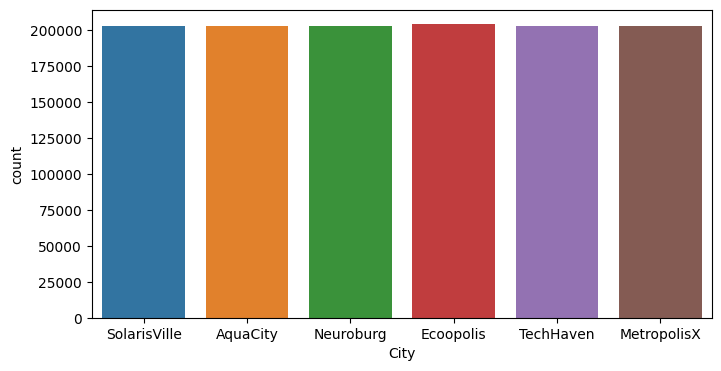

In [31]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='City')
plt.title('City')
plt.show()

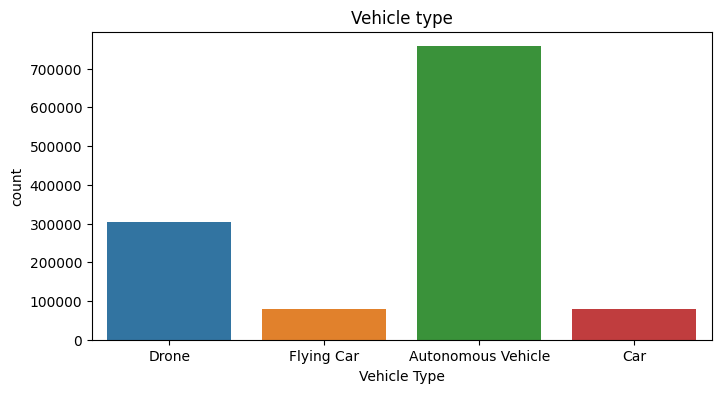

In [34]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Vehicle Type')
plt.title('Vehicle type')
plt.show()

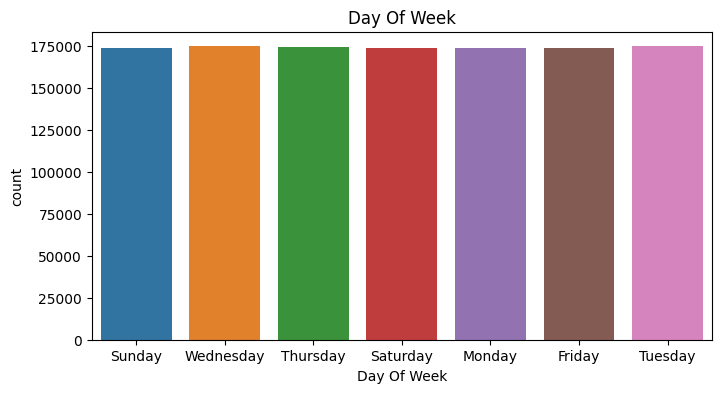

In [35]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Day Of Week')
plt.title('Day Of Week')
plt.show()